<a href="https://colab.research.google.com/github/waliamehak/CovidStatistics-dataAnalysis/blob/main/CovidMetrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mehak Walia 

#**To define the problem**

Covid has had an unprecedented impact on our lifestyle and on the world as a whole. This global pandemic has affected USA more than any other country in the world. Not so behind, is India, when it comes to total number of active cases of Covid. Given the current trends at which the number of cases are increasing per day in both the nations, India is bound to cross USA eventually.  
Therefore, I set out to determine the days before India will take over USA to become the most affected country by the virus. For this, I will scrape the current number of cases in both the nations, the average rate at which the count is increasing for them individually per day and then go from there.  

#**Exploring the Source Code**
The most accurate and popularly known source for the Covid count in different nations is [WorldMeters](https://www.worldometers.info/coronavirus/). Thus, I am going to scrape the source code from this website. I will be specifically working these two web pages, [USA](https://www.worldometers.info/coronavirus/country/us/) and [India](https://www.worldometers.info/coronavirus/country/india/), to scrape data from.  
Upon exploring the code, I observe that the active count and the death count for countries is enclosed inside **title** tag. 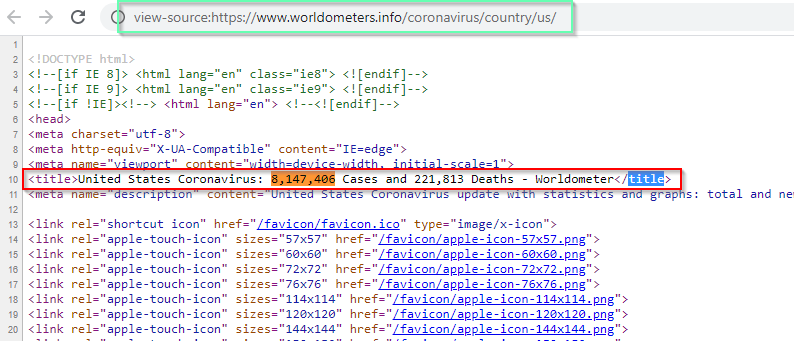

To get the rate at which the count is increasing for a country, I decided to fetch the daily new cases over the past two days and take an average to give me a more accurate prediction. Upon looking at the HTML code, this information has been stored within **li** tag and the class attribute associated is **news_li**. 
 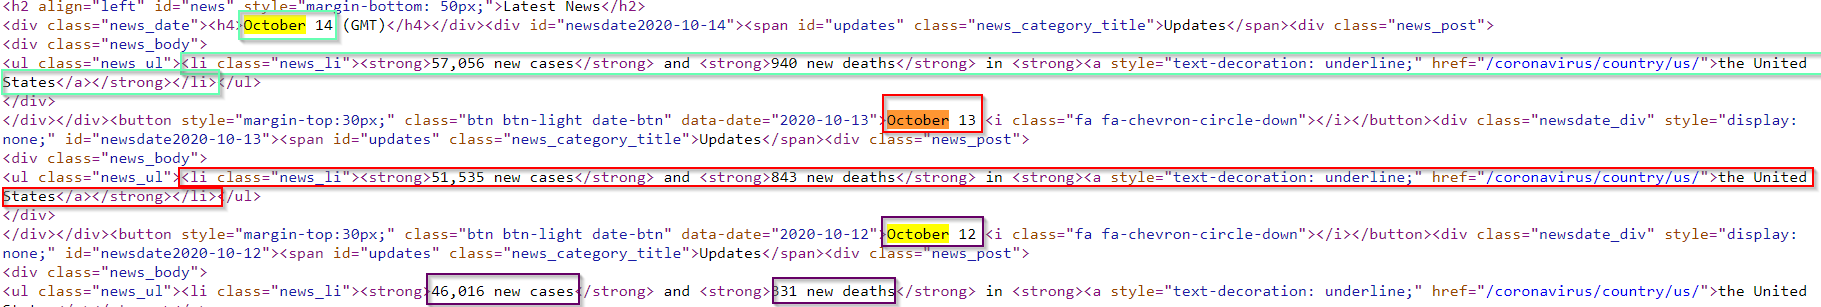 \
The same is to be done for the Indian webpage. After these steps, I have the information that I would need to solve the problem statement. Also, I see that the data cannot be used directly and I will have to apply some operations after scraping the data to render it meaningful and usable.

##Write the Scraper 
After exploring the data, the next step is to import the data and parse it obtain meaningful insights from it.  
I have used Requests API to scrape the data from the webpages and then used BeautifulSoup API to parse the data to obtain the numbers to work with. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import math

In [ ]:
usaURL = "https://www.worldometers.info/coronavirus/country/us/"
indianURL = "https://www.worldometers.info/coronavirus/country/india/"

In [ ]:
sourceUSA = requests.get(usaURL)
sourceIndia = requests.get(indianURL) 
print (sourceUSA)
print (sourceIndia)

<Response [200]>
<Response [200]>


In [ ]:
soup1 = BeautifulSoup(sourceUSA.content)
soup2 = BeautifulSoup(sourceIndia.content)

In [ ]:
totalCountUSA = soup1.findAll('title')
dailyCountUSA = soup1.findAll('ul', attrs = {'class':'news_ul'})



In [ ]:
for row in totalCountUSA:
    print(row.text)

United States Coronavirus: 8,150,043 Cases and 221,843 Deaths - Worldometer


At the time of writing this notebook, I see that the USA website is facing some kind of complication and cannot process the daily counts beyond two days, so I am restricting my calculation based on the trend for the last two days. They have highlighted the problem they are facing is prvided in the **NOTE** given below.  
Initially, when I tried scraping the data, I was able to scrape the available data for all the seven previous days. Should the website choose to list the data beyond past seven days, my code can easily handle that as well. But for now, I am adding a break statemnent that will only consider the first two readings for USA. To make things fair, I will be considering the two most recent readings from India as well.

In [ ]:
for row in dailyCountUSA:
    print(row.text)

59,693 new cases and 970 new deaths in the United States
51,535 new cases and 843 new deaths in the United States
46,016 new cases and 331 new deaths in the United States
NOTE: Washington State: "October 12: We were not able to update the DOH dashboard today. We have identified the data issues but it will take until tomorrow to fully test and implement required revisions. We expect to return to regular reporting on Tuesday, 10/13/2020. Data are current as of 11:59 p.m. on 10/9/2020. We were also unable to process the weekly file available for download and will provide the updated file once we implement the required revisions." [source]
42,106 new cases and 327 new deaths in the United States
NOTE: Washington State: "October 11: We were not able to update the dashboards on Sunday, 10/11/20 due to data processing issues. We hope to resolve these issues and return to regular reporting on Monday, 10/12/20. We also were not able to process the weekly file available for download and will pro

Doing the same things for India, we are able to retrieve the information that we would need to solve the problem of interest.

In [ ]:
totalCountIndia = soup2.findAll('title')
dailyCountIndia = soup2.findAll('ul', attrs = {'class':'news_ul'})

In [ ]:
for row in totalCountIndia:
    print(row.text)

India Coronavirus: 7,307,097 Cases and 111,311 Deaths - Worldometer


In [ ]:
for row in dailyCountIndia:
    print(row.text)

2,027 new cases in India [source] [source]
67,988 new cases and 694 new deaths in India [source] [source]
63,517 new cases and 723 new deaths in India [source] [source]
54,265 new cases and 710 new deaths in India [source]
54,265 new cases and 710 new deaths in India [source] [source]
67,757 new cases and 813 new deaths in India [source] [source]
74,535 new cases and 921 new deaths in India [source] [source]
73,196 new cases and 929 new deaths in India [source] [source]


## Process and Present
I see that the first number in totalCountUSA variable is the total active cases and the next one is the death count.  
Also, the first number in a dailyCountUSA row is the number of new cases per day and the second number is the number of deaths on that day in USA. 
So I will use a manually written function to retrieve these two numbers one by one and use them to solve the probem.

In [ ]:
def insights(able):
  flag=0
  count=[]
  activeCount=0
  deathCount=0
  for i in able[0]:
    for j in i:
      if (flag==1 and j==' '):
        flag=2
      if (j not in ['0','1','2','3','4','5','6','7','8','9']):
        continue
     
      if (flag==0 or flag==1):
        activeCount=activeCount*10+ int(j)
        flag=1
      else:
        deathCount=deathCount*10+ int(j)
    count.append(activeCount)
    count.append(deathCount)
    return count

For a string passed to the insights function, I am retrieving those two numbers and using them further for processing.

In [ ]:
countU=insights(totalCountUSA)
print(countU)

[8150043, 221843]


In [ ]:
countI=insights(totalCountIndia)
print(countI)

[7307097, 111311]


The first item in the list is the number of active cases and the second item in the list is the number of deaths in the respective countries.

In [ ]:
differenceActive=countU[0]-countI[0]
differenceDeaths=countU[1]-countI[1]
print (differenceActive)
print (differenceDeaths)

842946
110532


Now I intend to get the average of the daily count for both the nations and determine the rate of growth.

In [ ]:
def dailyInsights(row):
  flag=0
  count=[]
  activeCount=0
  deathCount=0
  for i in row:
    if (flag==1 and i==' '):
      flag=2
    if (i not in ['0','1','2','3','4','5','6','7','8','9']):
      continue
     
    if (flag==0 or flag==1):
      activeCount=activeCount*10+ int(i)
      flag=1
    else:
      deathCount=deathCount*10+ int(i)
  count.append(activeCount)
  count.append(deathCount)
  return count

In [ ]:
i=0
avgNewCountUSA=0
avgDeathCountUSA=0
for row in dailyCountUSA:
  if (i==2):
    break
  countu=dailyInsights(row.text)
  i+=1
  print(countu)
  avgNewCountUSA+=countu[0]/2
  avgDeathCountUSA+=countu[1]/2
print (avgNewCountUSA)  
print (avgDeathCountUSA)

    

[59693, 970]
[51535, 843]
55614.0
906.5


Similarly, doing this for India, I see the following numbers:

In [ ]:
i=0
avgNewCountIndia=0
avgDeathCountIndia=0
for row in dailyCountIndia:
  if (i==2):
    break
  print (row.text)
  counti=dailyInsights(row.text)
  i+=1
  print(counti)
  avgNewCountIndia+=counti[0]/2
  avgDeathCountIndia+=counti[1]/2
print (avgNewCountIndia)  
print (avgDeathCountIndia)

2,027 new cases in India [source] [source]
[2027, 0]
67,988 new cases and 694 new deaths in India [source] [source]
[67988, 694]
35007.5
347.0


Now we have everything that we need to solve the task at hand. So lets go!  
**Important Note:**  
*The data just got refreshed as it is a new day in India, so the information is not in yet, therefore I see these numbers. More about this at the end of the notebook.*

In [ ]:
noOfDays = differenceActive/(avgNewCountIndia-avgNewCountUSA)
if (noOfDays<0):
  print("USA will retain the first position when it comes to the most affected country for the forseeable future")
else:
  print( "It will take" , math.ceil(noOfDays), "days for India to surpass USA")
 
noOfDaysDeath=differenceDeaths/(avgDeathCountIndia-avgNewCountUSA)
if (noOfDaysDeath>0):
  print("It will take" , math.ceil(noOfDaysDeath), "number of days for India to surpass USA")
else:
  print("USA will retain the first position when it comes to the most number of deaths in a country for the forseeable future")

USA will retain the first position when it comes to the most affected country for the forseeable future
USA will retain the first position when it comes to the most number of deaths in a country for the forseeable future


There! we have the answer to our original problem statement!  
**It will take approximately *84 days* for India to surpass USA when it comes to the most number of active Covid cases in the world.**  
**Interestingly, we see that the average death count for USA is higher than India. So for the given trends, USA will continue to have more deaths than India. *Infact, the death gap is bound to increase if the trends remain the same.* This can also be deduced from the negative sign that we see for the noOfDaysDeath variable.**  
Needless to say that this extrapolation would have been more accurate, if I was able to scrape more historic data for USA.  
I am sure that the problem the website is facing is temporary and along the way I would be able to scrape more data normally.


**Important Note:**  
* This work was done an year ago, just uploading to github now.\*
*The data for India just got updated as a new day started for India at the time of submission. I just decided to compile and run everything  and the data is refreshed and the numbers are not in yet. From the calculations I did earlier, it turned out that it will take 84 days for India to surpass USA.  
I am sure if we will compile this at the end of day, I will see approximately similar result.  
I could take only one day into consideration and derive the result but that would defeat the purpose of what I am actually trying to do here, so I did not do that.*